In [44]:
## inspire by https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6
import numpy as np
import pandas as pd

from IPython.display import display # Allows the use of display() for DataFrames

## warnings from seaborn, data visualization package.
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', color_codes=True)

%matplotlib inline


#import seaborn as sns
#sns.set_style('darkgrid')


In [45]:
names = ['mpg',
         'cylinders',
         'displacement',
         'horsepower',
         'weight',
         'acceleration',
         'model_year',
         'origin',
         'car_name']

#df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', names=names)
## make sure you assign the seperator
df = pd.read_csv("./input/auto-mpg.data", sep='\s+', names = names)

## example: last column, car_name "chevrolet chevelle malibu", 
## pick first element only --> chevrolet
df['maker'] = df.car_name.map(lambda x: x.split()[0])
#df['maker'] = df.car_name

## assign the origin of the car
#print(set(df.origin))
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Asia'})

display(df.head(5))
print(df.shape)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,maker
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,ford torino,ford


(398, 10)


In [46]:
## remove the NaN component

df = df.applymap(lambda x: np.nan if x == '?' else x).dropna()
df['horsepower'] = df.horsepower.astype(float)
display(df.head(5))
print(df.shape)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,maker
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,ford torino,ford


(392, 10)


### factorplot and FacetGrid ###

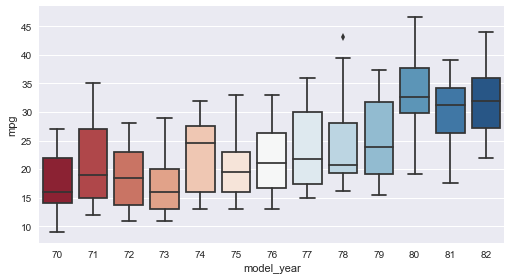

In [47]:
## six data are removed. 
## Note: We can use other techniques to replace the NaN query.

##fig, ax = plt.subplots(figsize=(12, 3))
##fig.set_size_inches(11.7, 8.27)

a = sns.factorplot(data=df, x="model_year", y="mpg", size=4, aspect=1.8, kind='box', palette="RdBu")

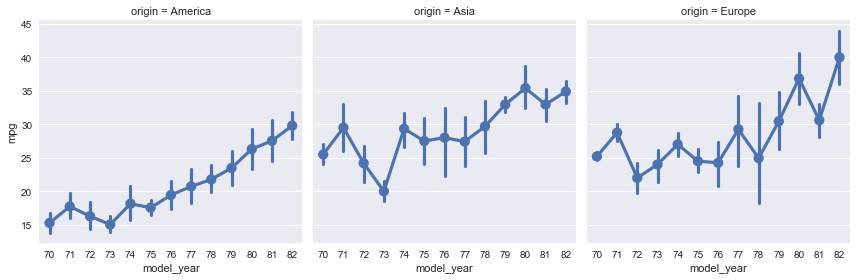

In [48]:
b = sns.factorplot(data=df, x="model_year", y="mpg", col='origin')

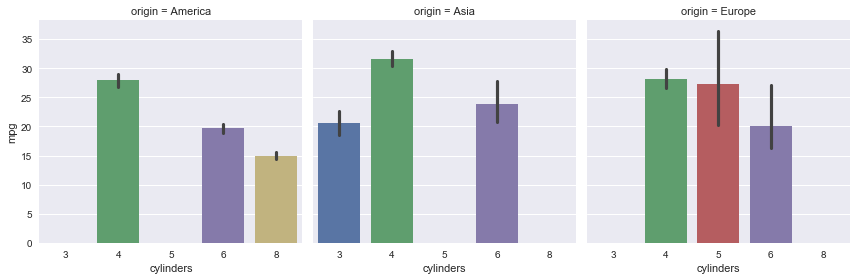

In [49]:
c = sns.factorplot(data=df, x="cylinders", y="mpg", col='origin', kind='bar')

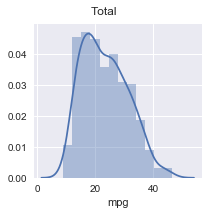

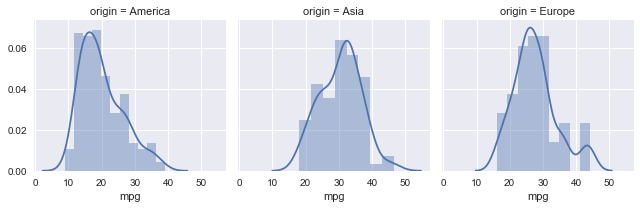

In [50]:
d = sns.FacetGrid(df)
d.map(sns.distplot, "mpg")
plt.subplots_adjust(top=0.9)
d.fig.suptitle('Total') # can also get the figure from plt.gcf()

dd = sns.FacetGrid(df, col="origin")
dd.map(sns.distplot, "mpg")

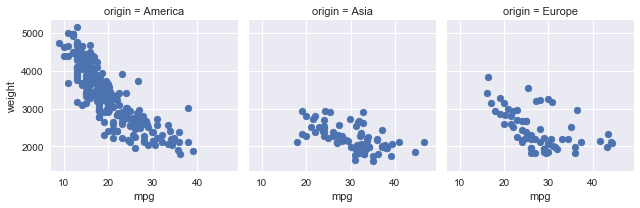

In [51]:
e = sns.FacetGrid(df, col="origin")
e.map(plt.scatter, "mpg", "weight")

### linear regression ###

(0, 60)

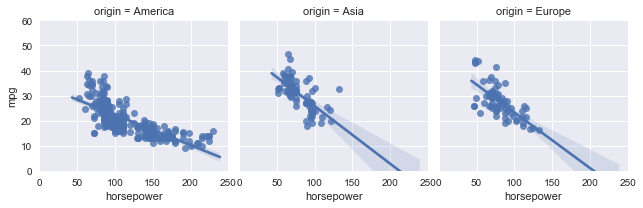

In [52]:
f = sns.FacetGrid(df, col="origin")
f.map(sns.regplot, "horsepower", "mpg")
plt.xlim(0, 250) 
plt.ylim(0, 60)

### Multiple features ###

(0, 60)

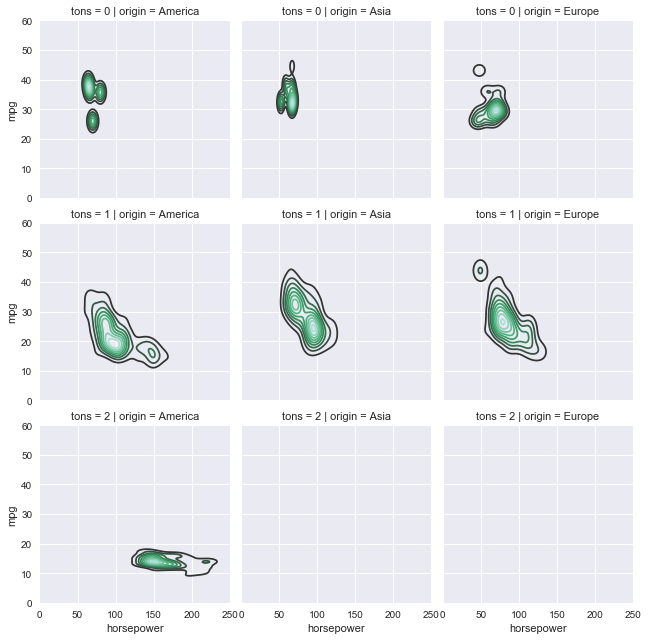

In [53]:
df['tons'] = (df.weight/2000).astype(int)
g = sns.FacetGrid(df, col="origin", row="tons")
g.map(sns.kdeplot, "horsepower", "mpg")
plt.xlim(0, 250)
plt.ylim(0, 60)

### pairplot and PairGrid ###

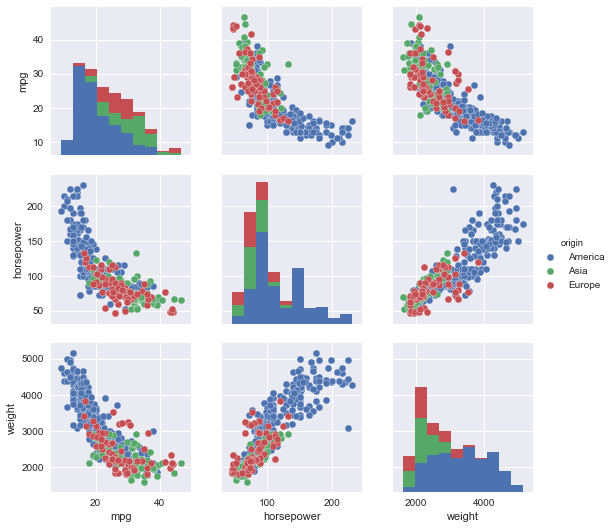

In [54]:
h = sns.pairplot(df[["mpg", "horsepower", "weight", "origin"]], hue="origin", diag_kind="hist")

for ax in h.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=0)

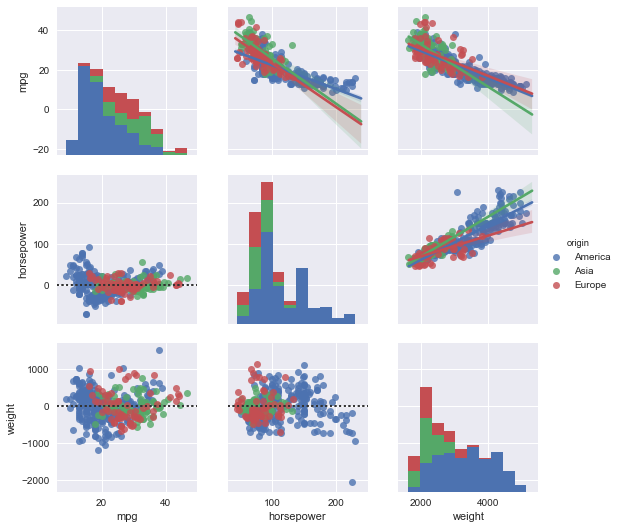

In [55]:
i = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]], hue="origin")
i.map_upper(sns.regplot)
i.map_lower(sns.residplot)
i.map_diag(plt.hist)

for ax in i.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=0)

i.add_legend()
i.set(alpha=0.2)

### jointplot and JointGrid ###

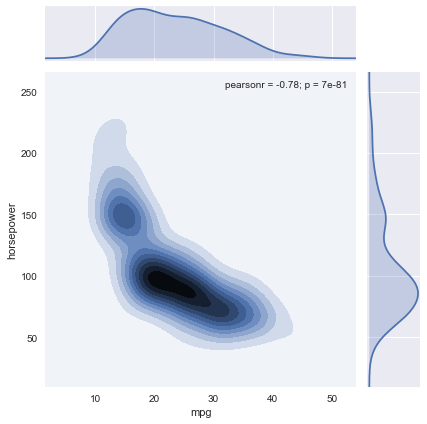

In [56]:
sns.jointplot("mpg", "horsepower", data=df, kind='kde')


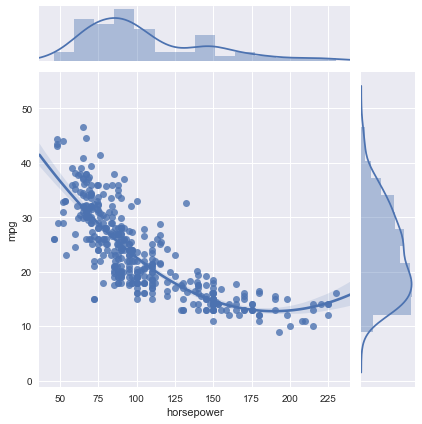

In [57]:
j = sns.JointGrid(x="horsepower", y="mpg", data=df)
j.plot_joint(sns.regplot, order = 2)
j.plot_marginals(sns.distplot)